<!-- KODE = "ja", "nei", default "ja" -->


<!-- dom:TITLE: Numerical solution of ordinary differential equations: Euler's and Heun's method -->
# Numerical solution of ordinary differential equations: Error estimation and step size control
<!-- dom:AUTHOR: Anne Kværnø, André Massing) -->
<!-- Author: -->  
**Anne Kværnø, André Massing**

Date: **March 22, 2021**

$\newcommand{mb}[1]{\mathbf{#1}}$

If you want to have a nicer theme for your jupyter notebook,
download the [cascade stylesheet file tma4125.css](https://www.math.ntnu.no/emner/TMA4125/2020v/part_II/notebooks/tma4125.css)
and execute the next cell:

In [1]:
from IPython.core.display import HTML
def css_styling():
    try:
        with open("tma4125.css", "r") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        pass #Do nothing

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

As always, we start by calling the necessary modules: And of course we want to import the required modules.

In [2]:
%matplotlib inline

import numpy as np
from numpy import pi
from numpy.linalg import solve, norm    
import matplotlib.pyplot as plt

# Use a funny plotting style
plt.xkcd()

newparams = {'figure.figsize': (6.0, 6.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

## Error estimation
Given two methods, one of order $p$ and the other of order $p+1$ or higher. Assume we have 
reached a point $(t_n,\mb{y}_n)$. One step forward with each of these methods can be written as

\begin{align*} 
  \mb{y}_{n+1} &= \mb{y}_n + \tau \mb{\Phi}(t_n, \mb{y}_n; \tau), && \text{order $p$}, \\ 
  \widehat{\mb{y}}_{n+1} &= \mb{y}_n + \tau \widehat{\mb{\Phi}}(t_n, \mb{y}_n; \tau), && \text{order $\widehat{p} = p+1$ or more}. \\ 
\end{align*}

Let $\mb{y}(t_{n+1};t_n,\mb{y}_n)$ be the exact solution of the ODE through $(t_n,\mb{y}_n)$. 
We would like to find an estimate for *the local error* $\mb{l}_{n+1}$, that is, the error in one step starting from  $(t_n, \mb{y}_n)$,

$$
\mb{l}_{n+1} = \mb{y}(t_{n+1};t_n,\mb{y}_n) - \mb{y}_{n+1}.
$$

As we already have seen, the local error is found by finding the power series in $\tau$ of the exact 
and the numerical solution. The local error is of order $p$ if the lowest order terms in the series where the exact and the numerical solution differ is of order $p+1$. So the local errors of the two methods are

\begin{align*}
\mb{y}(t_{n+1};t_n,\mb{y}_n) - \mb{y}_{n+1} &= \mb{\Psi}(t_n,y_n)\tau^{p+1}  +\dotsc, \\ 
\mb{y}(t_{n+1};t_n,\mb{y}_n) - \widehat{\mb{y}}_{n+1} &= \widehat{\mb{\Psi}}(t_n,y_n)\tau^{p+2} + \dotsc,
\end{align*}

where $\Psi(t_n,y_n)$ is a term consisting of method parameters and differentials of $\mb{f}$ and 
$\dotsc$ contains all the terms of the series of order $p+2$ or higher. 

Taking the difference gives

$$
\widehat{\mb{y}}_{n+1} - \mb{y}_{n+1} = \mb{\Psi}(t_n,\mb{y}_n)\tau^{p+1} + \ldots.
$$

Assume now that $\tau$ is small, such that the *principal error term* $\mb{\Psi(t_n,y_n)}\tau^{p+1}$ dominates the error series. Then a reasonable approximation to the unknown local error $\mb{l}_{n+1}$ is the *local error estimate* $\mb{le}_{n+1}$:

$$
\mb{le}_{n+1} = \widehat{\mb{y}}_{n+1} - \mb{y}_{n+1} \approx \mb{y}(t_{n+1};t_n,\mb{y}_n) - \mb{y}_{n+1}.
$$

## Stepsize control
The next step is to control the local error, that is, choose the step size so that $\|\mb{le}_{n+1}\| \leq \text{Tol}$ for some given tolerance Tol, and for some chosen norm $\|\cdot\|$. 

Essentially: 

Given $t_n, \mb{y}_n$ and a step size $\tau_n$. 
* Do one step with the method of choice, and find an error estimate $\mb{le}_{n+1}$. 

* if  $\|\mb{le}\|_{n+1} < \text{Tol}$

    * Accept the solution $t_{n+1}, \mb{y}_{n+1}$.

    * If possible, increase the step size for the next step.


* else

    * Repeat the step from $(t_n,\mb{y}_n)$ with a reduced step size $\tau_{n}$.


In both cases, the step size will change. But how? 

From the discussion above, we have that

$$
\| \mb{le}_{n+1} \| \approx D  \tau_{n}^{p+1}.
$$

where $\mb{le}_{n+1}$ is the error estimate we can compute, $D$ is some unknown quantity, which we assume almost constant from one step to the next. What we want is a step size $\tau_{new}$ such that

$$
\text{Tol} \approx D \tau _{new}^{p+1}.
$$

From these two approximations we get:

$$
\frac{\text{Tol}}{\|\mb{le}_{n+1}\|} \approx \left(\frac{\tau _{new}}{\tau _n}\right)^{p+1}
\qquad \Rightarrow \qquad
\tau_{new} \approx \left( \frac{\text{Tol}}{\|\mb{le}_{n+1}\|} \right)^{\frac{1}{p+1}} \tau _{n}.
$$

That is, if the current step $\tau_n$ was rejected, we try a new step $\tau _{new}$
with this approximation.
However, it is still possible that this new step will be rejected as well.
To avoid too many rejected steps, it is therefore common to be a bit restrictive when choosing the new 
step size, so the following is used in practice:

$$
\tau _{new} = P\cdot \left( \frac{\text{Tol}}{\|\mb{le}_{n+1}\|} \right)^{\frac{1}{p+1}} \tau _{n}.
$$

where the *pessimist factor* $P<1$ is some constant, normally chosen between 0.5 and 0.95.

## Implementation
We have all the bits and pieces for constructing an adaptive ODE solver based on Euler's and Heuns's methods. There are still some practical aspects to consider: 

* The combination of the two methods, implemented in `heun_euler` can be written as

\begin{align*}
      \mb{k}_1 &= \mb{f}(t_n, \mb{y}_n), \\ 
      \mb{k}_2 &= \mb{f}(t_n+\tau, \mb{y}_n+\tau \mb{k}_1), \\ 
      \mb{y}_{n+1} &= \mb{y}_n + \tau \mb{k}_1, && \text{Euler} \\ 
      \widehat{\mb{y}}_{n+1} &= \mb{y}_n + \frac{\tau}{2}(\mb{k}_1 + \mb{k}_2), && \text{Heun} \\ 
      \mb{le}_{n+1} &= \|\widehat{\mb{y}}_{n+1} - \mb{y}_{n+1}\| = \frac{\tau}{2}\|\mb{k}_2-\mb{k}_1 \|.
    \end{align*}

* Even if the error estimate is derived for the lower order method, in this case Euler's method, it is common to advance the solution with the higher order method, since the additional accuracy is for free. 

* Adjust the last step to be able to terminate the solutions exactly in $T$. 

* To avoid infinite loops, add some stopping criteria. In the code below, there is a maximum number of allowed steps (rejected or accepted). 

A Runge - Kutta methods with an error estimate are usually called **embedded Runge - Kutta methods** or **Runge - Kutta pairs**, and
the coefficients can be written in a Butcher tableau as follows

$$
\begin{array}{c|ccccl}
    c_1 & a_{11} & a_{12} & \cdots & a_{1s} \\ 
    c_2 & a_{21} & a_{22} & \cdots & a_{2s} \\ 
    \vdots & \vdots &&&\vdots \\ 
    c_s & a_{s1} & a_{s2} & \cdots & a_{ss} \\ \hline
        & b_1 & b_2 & \cdots & b_s  & \qquad\text{Order $p$}\\ \hline
        & \widehat{b}_1 & \widehat{b_2} & \cdots & \widehat{b}_s  & \qquad\text{Order $\widehat{p}= p+1$}
   \end{array}.
$$

Since 
 * $\mb{y}_{n+1} = \mb{y}_n + \tau_n\sum_{i=1}^s b_i \mb{k}_i$
 * $\widehat{\mb{y}}_{n+1} = \mb{y}_n + \tau_n\sum_{i=1}^s \widehat{b}_i \mb{k}_i$
 
the error estimate is simply given by
$$
\mb{le}_{n+1} = \tau_n\sum_{i=1}^s (\widehat{b}_i - b_i)\mb{k}_i.
$$


Recalling Euler and Heun,
$$
\begin{array}{ccccccc}
    \displaystyle
    \begin{array}{c|c}
      0 & 0 \\ \hline & 1
    \end{array}
    & \qquad  &
    \displaystyle
    \begin{array}{c|cc}
      0 & 0 & 0\\ 1 & 1 &0 \\ \hline & \frac{1}{2} & \frac{1}{2} 
    \end{array}
    \\
    \text{Euler} && \text{Heun}
  \end{array}
$$

and the Heun-Euler pair can be written as
$$
\begin{array}{c|cc} 0 & & \\ 1 & 1 &   \\ \hline & 1 & 0 \\ \hline \displaystyle & \frac{1}{2} &  \frac{1}{2} 
 \end{array}
$$

A particular mention deserves also the classical 4-stage Runge-Kutta method
from a previous numerical exercise, which can be written as

$$
\begin{array}{c|cccc}
      0 & 0 & 0 & 0 & 0\\ \frac{1}{2} &  \frac{1}{2} & 0 & 0 & 0\\ \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0\\ 1 &  0 & 0 & 1 & 0 \\ \hline & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6}  
    \end{array}
$$

See this [list of Runge - Kutta methods](https://en.wikipedia.org/wiki/List_of_Runge–Kutta_methods) for more.

For the last one there exist also a embedded Runge-Kutta 4(3) variant
due to **Fehlberg**:
$$
\begin{array}{c|ccccc}
      0 & 0 & 0 & 0 & 0 & 0
      \\ 
      \frac{1}{2} & \frac{1}{2} & 0 & 0 & 0 & 0
      \\ 
      \frac{1}{2} & 0 & \frac{1}{2} & 0 & 0 & 0
      \\
      1 &  0 & 0 & 1 & 0 & 0
      \\
      1 & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6} & 0 
      \\
      \hline 
      & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & 0 & \frac{1}{6} 
      \\
     \hline 
      & \frac{1}{6} & \frac{1}{3} & \frac{1}{3} & \frac{1}{6} & 0
\end{array}
$$

In [3]:
import numpy as np
from  numpy.linalg import norm
import matplotlib.pyplot as plt
from ode import EmbeddedExplicitRungeKutta

**Example**: Solving the Brusselator (a simple model for chemical oscillators)
See this [Brusselator](https://en.wikipedia.org/wiki/Brusselator) for more.
\begin{align}
y_1' &= 1 + y_1^2 y_2 - 4 y_1 \\
y_2' &= 3y_1 - y_1^2y_2
\end{align}

In [4]:
def f(t,y):
    return np.array([1.0+y[0]**2*y[1]-4*y[0],
                     3*y[0]-y[0]**2*y[1]])

y0 = np.array([1.5,
               3])
t0, T = 0, 20

Nmax = 1000
tol = 1e-4

#Fehlberg method
a = np.array([[0.0, 0,   0,   0,   0],
              [1/2, 0,   0,   0,   0],
              [0, 1/2,   0,   0,   0],
              [0,   0,   1,   0,   0],
              [1/6, 1/3, 1/3, 1/6, 0]])
b =  np.array([1/6, 1/3, 1/3, 0, 1/6])
bhat = np.array([1/6, 1/3, 1/3, 1/6, 0])
c = np.array([0.,
               1/2,
               1/2,
               1,
               1])
p = 4

fehlberg = EmbeddedExplicitRungeKutta(a=a,b=b, c=c, bhat=bhat, order=p)
ts, ys, ts_rej, ys_rej = fehlberg(y0, t0, T, f, Nmax, tol, store_rejected=True)

Step is rejected at t = 0.3337238268400299 with err = 0.00013372999077240302
Step is rejected at t = 6.468657177019609 with err = 0.00010024865552681722
Step is rejected at t = 6.701491630733507 with err = 0.00045656237053228594
Step is rejected at t = 6.805555131065931 with err = 0.00011243286809915643
Step is rejected at t = 7.223756987746132 with err = 0.00025273741484123076
Step is rejected at t = 7.257808207693208 with err = 0.00011752473164987421
Step is rejected at t = 13.76138978952863 with err = 0.005219640704669287
Step is rejected at t = 13.867196633546301 with err = 0.00010272508994329972
Step is rejected at t = 14.047403146306515 with err = 0.00010348703182738191
Step is rejected at t = 14.37720496935941 with err = 0.0002950203237570343
Step is rejected at t = 14.411358510267524 with err = 0.000123146699524268
Finishing time-stepping reaching t = 20.30861292959841 with final time T = 20
Used 147 steps out of 1000 with 11 being rejected


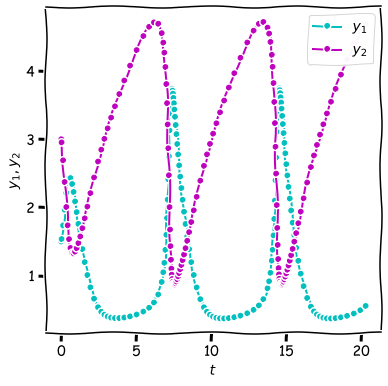

In [5]:
plt.figure()
plt.plot(ts, ys[:,0], "co-", label="$y_1$", markersize="4")
plt.plot(ts, ys[:,1], "mo-", label="$y_2$", markersize="4")
#plt.plot(ts_rej, ys_rej[:,0], "bx", label="$y_1$ (rej)", markersize="10")
#plt.plot(ts_rej, ys_rej[:,1], "rx", label="$y_2$ (rej)", markersize="10")
plt.xlabel("$t$")
plt.ylabel("$y_1, y_2$")
plt.legend(loc="upper right")